In [2]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 5.4 MB/s eta 0:00:00


In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error


# **VCB**

In [4]:
# Import data
df = pd.read_csv("VCB.VN.csv")
df.dropna(inplace=True)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

# Sort 'Date' asc
df.sort_values('Date', inplace=True)

#Input biến 'price'
price = pd.DataFrame(df, columns=['Close'])

In [5]:
# df.head()
#5 dòng cuối
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,40478.953125,41275.257813,40346.234375,41275.257813,41275.257813,1225908.0
2019-03-04,41275.257813,41806.132813,41275.257813,41673.414063,41673.414063,2030592.0
2019-03-05,41673.414063,42337.003906,41474.335938,41806.132813,41806.132813,2376092.0
2019-03-06,41872.488281,42005.207031,41076.183594,41607.054688,41607.054688,2107101.0
2019-03-07,41607.054688,42337.003906,41540.695313,41872.488281,41872.488281,3091640.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1311 entries, 2019-03-01 to 2024-06-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1311 non-null   float64
 1   High       1311 non-null   float64
 2   Low        1311 non-null   float64
 3   Close      1311 non-null   float64
 4   Adj Close  1311 non-null   float64
 5   Volume     1311 non-null   float64
dtypes: float64(6)
memory usage: 71.7 KB


In [9]:
# Describe  volatily
# 25% q1, 75% q3, 50% median
volatily_VCB.describe()

,Close
count,1310.000000
mean,0.072245
std,1.674074
min,-6.991868
25%,-0.820399
50%,0.000000
75%,0.887484
max,6.915477


Kurtosis: [2.47755503]


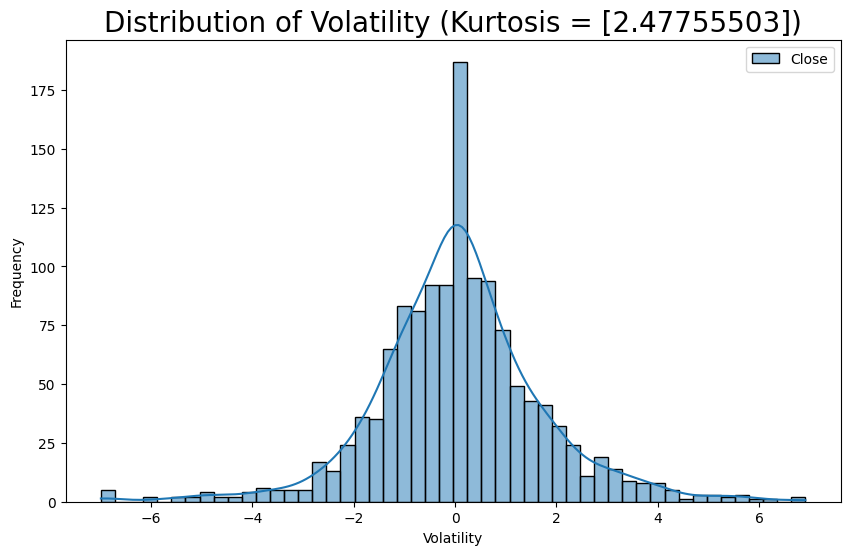

In [26]:
kurt_value = kurtosis(volatily_VCB)
print("Kurtosis:", kurt_value)
plt.figure(figsize=(10, 6))
sns.histplot(volatily_VCB, bins=50, kde=True, color='blue')

# Thêm tiêu đề và nhãn
plt.title(f'Distribution of Volatility (Kurtosis = {kurt_value})', fontsize=20)
plt.xlabel('Volatility')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()

# Visualize **data**

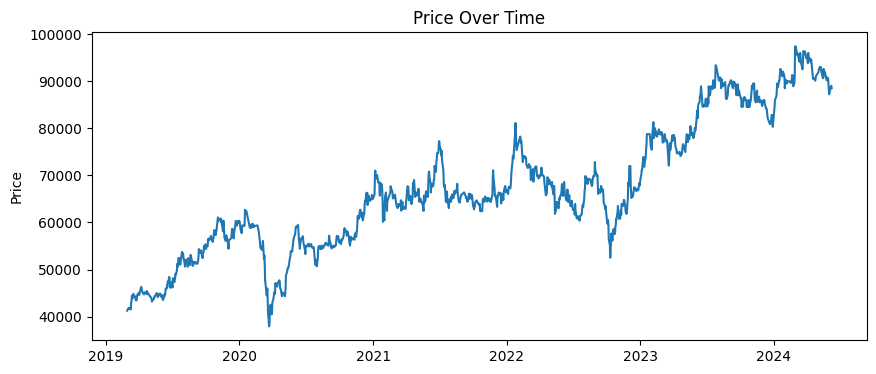

In [7]:
# 'Close' price follow time
plt.figure(figsize=(10, 4))
plt.plot(df['Close'])
plt.title('Price Over Time')
plt.ylabel('Price')
plt.show()

## Calculate %**Volality** and **Visualize**

Text(0.5, 1.0, 'Volatily')

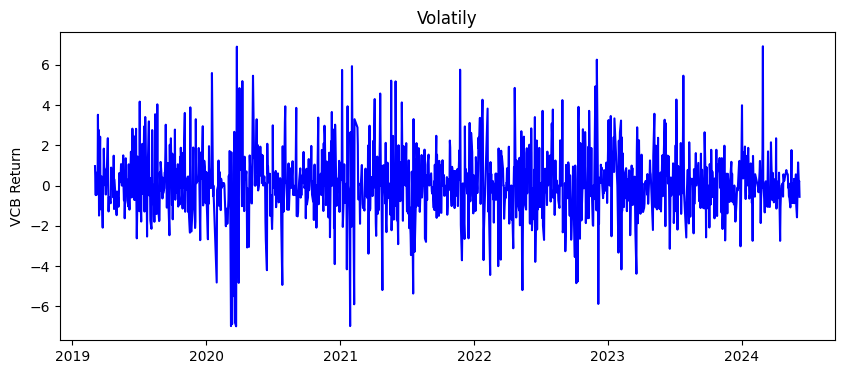

In [8]:
volatily_VCB = 100 * price.pct_change().dropna()
plt.figure(figsize=(10,4))
plt.plot(volatily_VCB, color='blue')
# Tỷ suất lợi nhuận
plt.ylabel('VCB Return')
plt.title('Volatily')

# Check **STATIONARITY**

In [12]:
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt
# Function kiểm tra tính dừng
def test_stationarity(data):
    # Kiểm tra tính dừng bằng Augmented Dickey-Fuller test (ADF)
    result_adf = adfuller(data)
    print('ADF Statistic:', result_adf[0])
    print('p-value:', result_adf[1])
    print('Critical Values:', result_adf[4])
    if result_adf[1] <= 0.05:
        print("ADF test: Data is stationary")
    else:
        print("ADF test: Data is non-stationary")
# test_stationarity(df['Close'])
test_stationarity(volatily_VCB)

ADF Statistic: -16.063115276258902
p-value: 5.61087680294607e-29
Critical Values: {'1%': -3.4353708501743654, '5%': -2.8637572934525286, '10%': -2.56795049999266}
ADF test: Data is stationary


# Calculate ACF, PACF to select p,q params for model GARCH(p,q)
# With q = acf, p = pacf ( lấy các điểm lồi lên khỏi vùng xanh là được )

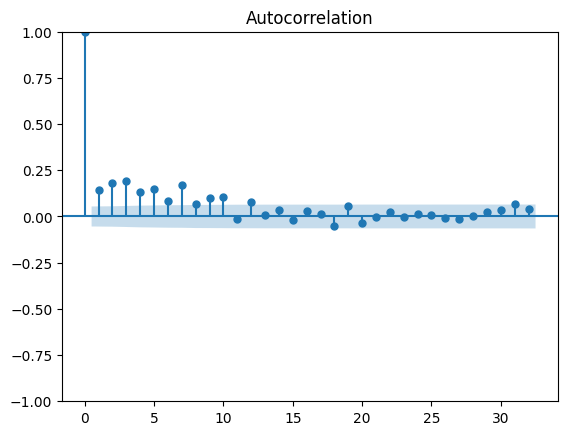

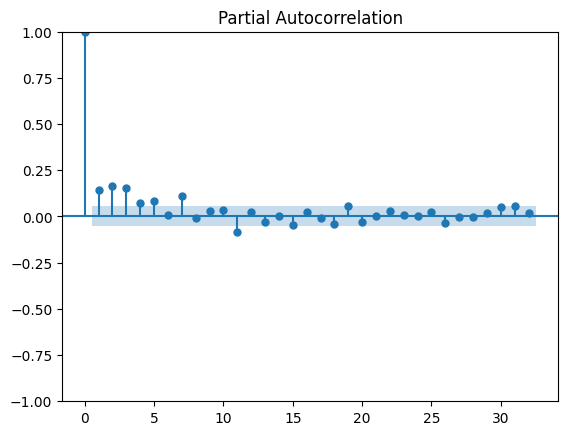

In [13]:
plot_acf(volatily_VCB**2)
plot_pacf(volatily_VCB**2)
plt.show()

In [14]:
# Fit model
model = arch_model(volatily_VCB, p=1, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 49342.023722267506
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2651.6424602864595
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2624.596407777936
Iteration:      4,   Func. Count:     26,   Neg. LLF: 4229.048169115592
Iteration:      5,   Func. Count:     32,   Neg. LLF: 2507.770091775243
Iteration:      6,   Func. Count:     38,   Neg. LLF: 2499.624631807291
Iteration:      7,   Func. Count:     44,   Neg. LLF: 2469.924517145817
Iteration:      8,   Func. Count:     50,   Neg. LLF: 2469.7858855458426
Iteration:      9,   Func. Count:     55,   Neg. LLF: 2469.785553959906
Iteration:     10,   Func. Count:     60,   Neg. LLF: 2469.7855499661327
Iteration:     11,   Func. Count:     64,   Neg. LLF: 2469.7855499662237
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2469.7855499661327
            Iterations: 11
            Function evaluations: 64
            Gradient evaluatio

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2469.79
Distribution:                  Normal   AIC:                           4947.57
Method:            Maximum Likelihood   BIC:                           4968.28
                                        No. Observations:                 1310
Date:                Tue, Jun 18 2024   Df Residuals:                     1309
Time:                        10:20:04   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0919  4.128e-02      2.227  2.593e-02 [1.104e-02,  0.173]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5160      0.134      3.850  1.181e-04   [  0.253,  0.779]
alpha[1]       0.1627  4.201e-02      3.873  1.074e-04 [8.037e-02,  0.245]
beta[1]        0.6535  7.048e-02      9.272  1.831e-20   [  0.515,  0.792]
==========================================================================

Covariance estimator: robust
"""

# **Rolling Forecast Origin**

In [15]:
rolling_predictions_VCB = []
test_size_VCB = int(0.3 * len(volatily_VCB))
for i in range(test_size_VCB):
  # Tạo tập dữ liệu đào tạo bằng cách cắt từ đầu đến mỗi điểm dữ liệu trong tập kiểm tra
  train_VCB = volatily_VCB[:-(test_size_VCB-i)]
  # Tạo mô hình GARCH (1,1) bằng cách sử dụng dữ liệu đào tạo
  model_VCB = arch_model(train_VCB, p=1, q=1)

  # Ước lượng mô hình GARCH đã tạo với dữ liệu đào tạo
  model_fit_VCB = model_VCB.fit(disp='off')

  # Dự đoán một giai đoạn tiếp theo của biến động (volatility) bằng cách sử dụng hàm forecast() từ mô hình đã ước lượng
  pred_VCB = model_fit_VCB.forecast(horizon=1)

  # Thêm giá trị dự đoán cuối cùng của mỗi lượt dự đoán vào danh sách rolling_predictions_VCB
  rolling_predictions_VCB.append(np.sqrt(pred_VCB.variance.values[-1,:][0]))

In [16]:
# Tạo một Series Pandas từ danh sách rolling_predictions, với index được thiết lập là các chỉ mục cuối cùng của tập dữ liệu volatily (tập kiểm tra)
rolling_predictions_VCB = pd.Series(rolling_predictions_VCB, index=volatily_VCB.index[-test_size_VCB:])

In [17]:
from datetime import datetime, timedelta
# Giả định volatily_VCB và test_size_VCB đã được xác định trước đó
def predict_next_days(start_date, days_to_predict, volatily_VCB, test_size_VCB):
    forecasted_next_days_VCB = []
    for i in range(days_to_predict):
        train_VCB = volatily_VCB[:-(test_size_VCB+i)]
        model_VCB = arch_model(train_VCB, p=1, q=1)
        model_fit_VCB = model_VCB.fit(disp='off')
        pred_VCB = model_fit_VCB.forecast(horizon=1)
        forecasted_next_days_VCB.append(np.sqrt(pred_VCB.variance.values[-1,:][0]))

    # Thêm một giá trị không xác định (nan) vào cuối danh sách dự đoán để đại diện cho dự đoán cuối cùng
    forecasted_next_days_VCB.append(np.nan)

    # Tạo ngày bắt đầu dự đoán bằng cách sử dụng start_date được chỉ định
    start_date = start_date

    # Tạo một danh sách chỉ mục mới cho các dự đoán tiếp theo số ngày được chỉ định
    index_forecasted_VCB = pd.date_range(start=start_date, periods=len(forecasted_next_days_VCB))

    return index_forecasted_VCB, forecasted_next_days_VCB

# **Gộp 3 đường vào cùng 1 biểu đồ**

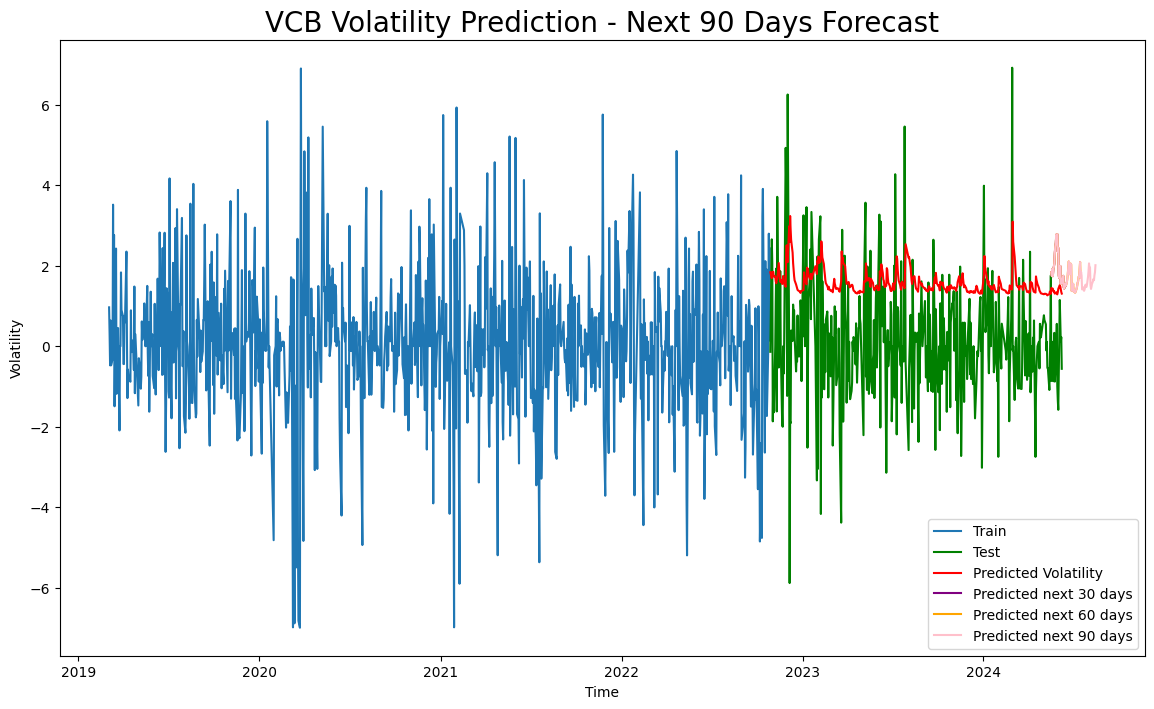

In [18]:
# Đặt số ngày dự đoán
days_to_predict = [30, 60, 90]
colors = ['purple', 'orange', 'pink']  # Màu sắc cho từng đường dự đoán

# Đặt ngày bắt đầu dự đoán
start_date = pd.Timestamp('2024-05-17')

# Khởi tạo biểu đồ
plt.figure(figsize=(14, 8))

# Vẽ dữ liệu đào tạo
plt.plot(volatily_VCB[:-test_size_VCB], label='Train')
# Vẽ dữ liệu kiểm tra
plt.plot(volatily_VCB[-test_size_VCB:], label='Test', color='green')
# Vẽ dự đoán trượt
plt.plot(rolling_predictions_VCB, label='Predicted Volatility', color='red')

# Dự đoán cho mỗi số ngày được chỉ định và vẽ biểu đồ tương ứng
for days, color in zip(days_to_predict, colors):
    index_forecasted_VCB, forecasted_next_days_VCB = predict_next_days(start_date, days, volatily_VCB, test_size_VCB)

    # Vẽ dự đoán cho số ngày được chỉ định
    plt.plot(index_forecasted_VCB, forecasted_next_days_VCB, label=f'Predicted next {days} days', color=color)

# Thêm tiêu đề và chú thích
plt.title(f'VCB Volatility Prediction - Next 90 Days Forecast', fontsize=20)
plt.legend(fontsize=10)
plt.xlabel('Time')
plt.ylabel('Volatility')

# Hiển thị biểu đồ
plt.show()


In [20]:
test_actual_values_VCB = volatily_VCB[-test_size_VCB:]
test_predicted_values_VCB = rolling_predictions_VCB[volatily_VCB.index[-test_size_VCB:]]

# Calculate MAE_VCB (Mean Absolute Error)
mae_VCB = mean_absolute_error(test_actual_values_VCB, test_predicted_values_VCB)

# Calculate RMSE_VCB (Root Mean Squared Error)
rmse_VCB = np.sqrt(mean_squared_error(test_actual_values_VCB, test_predicted_values_VCB))

# Calculate MAPE_VCB (Mean Absolute Percentage Error)
epsilon = 1e-4
test_actual_values_VCB_nonzero = test_actual_values_VCB.replace(0, epsilon)
mape_VCB = np.mean(np.abs((test_actual_values_VCB - test_predicted_values_VCB) / test_actual_values_VCB_nonzero))

print("MAE_VCB:", mae_VCB)
print("RMSE_VCB:", rmse_VCB)
print("MAPE_VCB (%):", mape_VCB)

MAE_VCB: 1.740783428761794
RMSE_VCB: 2.09746050143486
MAPE_VCB (%): nan


# **CTG**

In [ ]:
# Import data
df = pd.read_csv("CTG.VN.csv")
df.dropna(inplace=True)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

# Sort 'Date' asc
df.sort_values('Date', inplace=True)

#Input biến 'price'
price = pd.DataFrame(df, columns=['Close'])

In [ ]:
# df.head()
#5 dòng cuối
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-03,32250.0,32800.0,32050.0,32600.0,32600.0,18001600.0
2024-06-04,32700.0,32950.0,32450.0,32800.0,32800.0,8982900.0
2024-06-05,32900.0,32950.0,32400.0,32400.0,32400.0,8426500.0
2024-06-06,32500.0,32700.0,32350.0,32600.0,32600.0,7577100.0
2024-06-07,32800.0,32900.0,32650.0,32800.0,32800.0,4350200.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1317 entries, 2019-03-01 to 2024-06-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1317 non-null   float64
 1   High       1317 non-null   float64
 2   Low        1317 non-null   float64
 3   Close      1317 non-null   float64
 4   Adj Close  1317 non-null   float64
 5   Volume     1317 non-null   float64
dtypes: float64(6)
memory usage: 72.0 KB


In [ ]:
# Describe 'Close' price
# 25% q1, 75% q3, 50% median
price.describe()

,Close
count,1317.000000
mean,23713.870154
std,6526.769661
min,11925.876953
25%,16710.095703
50%,25192.072266
75%,28635.972656
max,37719.050781


# Visualize **data**

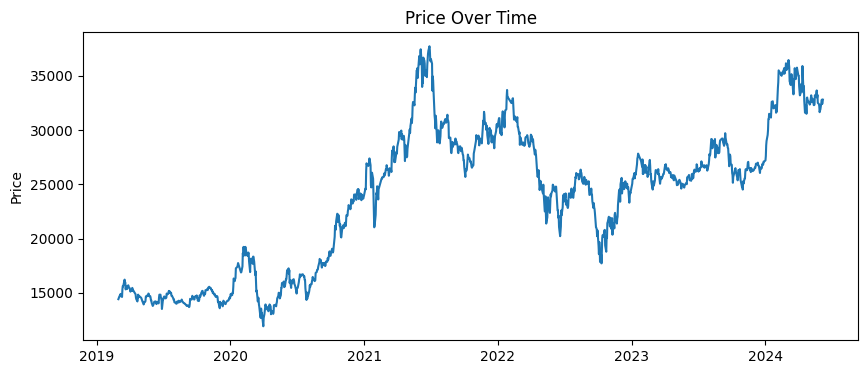

In [ ]:
# 'Close' price follow time
plt.figure(figsize=(10, 4))
plt.plot(df['Close'])
plt.title('Price Over Time')
plt.ylabel('Price')
plt.show()

## Calculate %**Volality** and **Visualize**

Text(0.5, 1.0, 'Volatily')

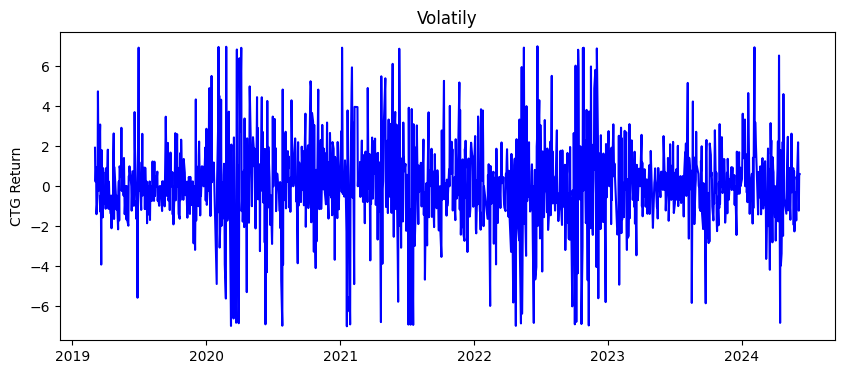

In [ ]:
volatily_CTG = 100 * price.pct_change().dropna()
plt.figure(figsize=(10,4))
plt.plot(volatily_CTG, color='blue')
# Tỷ suất lợi nhuận
plt.ylabel('CTG Return')
plt.title('Volatily')

# Check **STATIONARITY**

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt
# Function kiểm tra tính dừng
def test_stationarity(data):
    # Kiểm tra tính dừng bằng Augmented Dickey-Fuller test (ADF)
    result_adf = adfuller(data)
    print('ADF Statistic:', result_adf[0])
    print('p-value:', result_adf[1])
    print('Critical Values:', result_adf[4])
    if result_adf[1] <= 0.05:
        print("ADF test: Data is stationary")
    else:
        print("ADF test: Data is non-stationary")
# test_stationarity(df['Close'])
test_stationarity(volatily_CTG)

ADF Statistic: -12.023147940599022
p-value: 2.991012962652186e-22
Critical Values: {'1%': -3.435363151990756, '5%': -2.863753896647996, '10%': -2.5679486910456264}
ADF test: Data is stationary


# Calculate ACF, PACF to select p,q params for model GARCH(p,q)
# With q = acf, p = pacf ( lấy các điểm lồi lên khỏi vùng xanh là được )

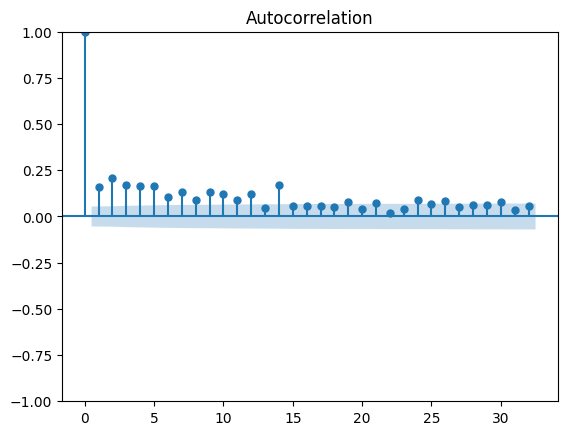

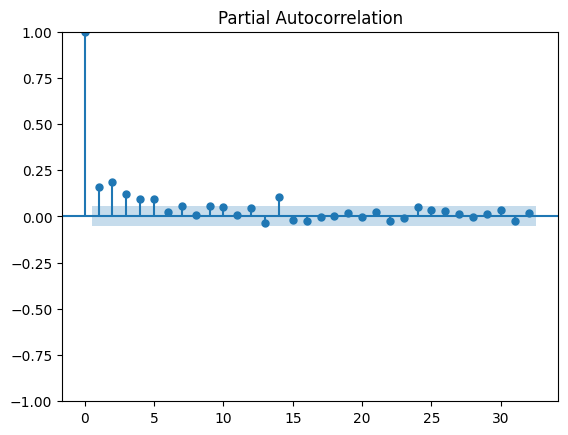

In [ ]:
plot_acf(volatily_CTG**2)
plot_pacf(volatily_CTG**2)
plt.show()

In [ ]:
# Fit model
model = arch_model(volatily_CTG, p=1, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7825.943969067546
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3040.9884616566956
Iteration:      3,   Func. Count:     24,   Neg. LLF: 3627.1826312874136
Iteration:      4,   Func. Count:     32,   Neg. LLF: 3173.090779455883
Iteration:      5,   Func. Count:     40,   Neg. LLF: 2790.7789667468514
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2790.7782876605106
Iteration:      7,   Func. Count:     50,   Neg. LLF: 2790.778284885665
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2790.7782848857105
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2790.778284885665
            Iterations: 8
            Function evaluations: 54
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2790.78
Distribution:                  Normal   AIC:                           5589.56
Method:            Maximum Likelihood   BIC:                           5610.29
                                        No. Observations:                 1316
Date:                Sun, Jun 16 2024   Df Residuals:                     1315
Time:                        14:59:15   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0863  5.005e-02      1.725  8.448e-02 [-1.175e-02,  0.184]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1415  7.027e-02      2.013  4.407e-02 [3.757e-03,  0.279]
alpha[1]       0.0995  2.235e-02      4.451  8.548e-06 [5.568e-02,  0.143]
beta[1]        0.8732  3.227e-02     27.063 2.654e-161   [  0.810,  0.936]
==========================================================================

Covariance estimator: robust
"""

# **Rolling Forecast Origin**

In [ ]:
rolling_predictions_CTG = []
test_size_CTG = int(0.3 * len(volatily_CTG))
for i in range(test_size_CTG):
  # Tạo tập dữ liệu đào tạo bằng cách cắt từ đầu đến mỗi điểm dữ liệu trong tập kiểm tra
  train_CTG = volatily_CTG[:-(test_size_CTG-i)]
  # Tạo mô hình GARCH (1,1) bằng cách sử dụng dữ liệu đào tạo
  model_CTG = arch_model(train_CTG, p=1, q=1)

  # Ước lượng mô hình GARCH đã tạo với dữ liệu đào tạo
  model_fit_CTG = model_CTG.fit(disp='off')

  # Dự đoán một giai đoạn tiếp theo của biến động (volatility) bằng cách sử dụng hàm forecast() từ mô hình đã ước lượng
  pred_CTG = model_fit_CTG.forecast(horizon=1)

  # Thêm giá trị dự đoán cuối cùng của mỗi lượt dự đoán vào danh sách rolling_predictions_CTG
  rolling_predictions_CTG.append(np.sqrt(pred_CTG.variance.values[-1,:][0]))

In [ ]:
# Tạo một Series Pandas từ danh sách rolling_predictions, với index được thiết lập là các chỉ mục cuối cùng của tập dữ liệu volatily (tập kiểm tra)
rolling_predictions_CTG = pd.Series(rolling_predictions_CTG, index=volatily_CTG.index[-test_size_CTG:])

In [ ]:
from datetime import datetime, timedelta
# Giả định volatily_CTG và test_size_CTG đã được xác định trước đó
def predict_next_days(start_date, days_to_predict, volatily_CTG, test_size_CTG):
    forecasted_next_days_CTG = []
    for i in range(days_to_predict):
        train_CTG = volatily_CTG[:-(test_size_CTG+i)]
        model_CTG = arch_model(train_CTG, p=1, q=1)
        model_fit_CTG = model_CTG.fit(disp='off')
        pred_CTG = model_fit_CTG.forecast(horizon=1)
        forecasted_next_days_CTG.append(np.sqrt(pred_CTG.variance.values[-1,:][0]))

    # Thêm một giá trị không xác định (nan) vào cuối danh sách dự đoán để đại diện cho dự đoán cuối cùng
    forecasted_next_days_CTG.append(np.nan)

    # Tạo ngày bắt đầu dự đoán bằng cách sử dụng start_date được chỉ định
    start_date = start_date

    # Tạo một danh sách chỉ mục mới cho các dự đoán tiếp theo số ngày được chỉ định
    index_forecasted_CTG = pd.date_range(start=start_date, periods=len(forecasted_next_days_CTG))

    return index_forecasted_CTG, forecasted_next_days_CTG

# **Gộp 3 đường vào cùng 1 biểu đồ**

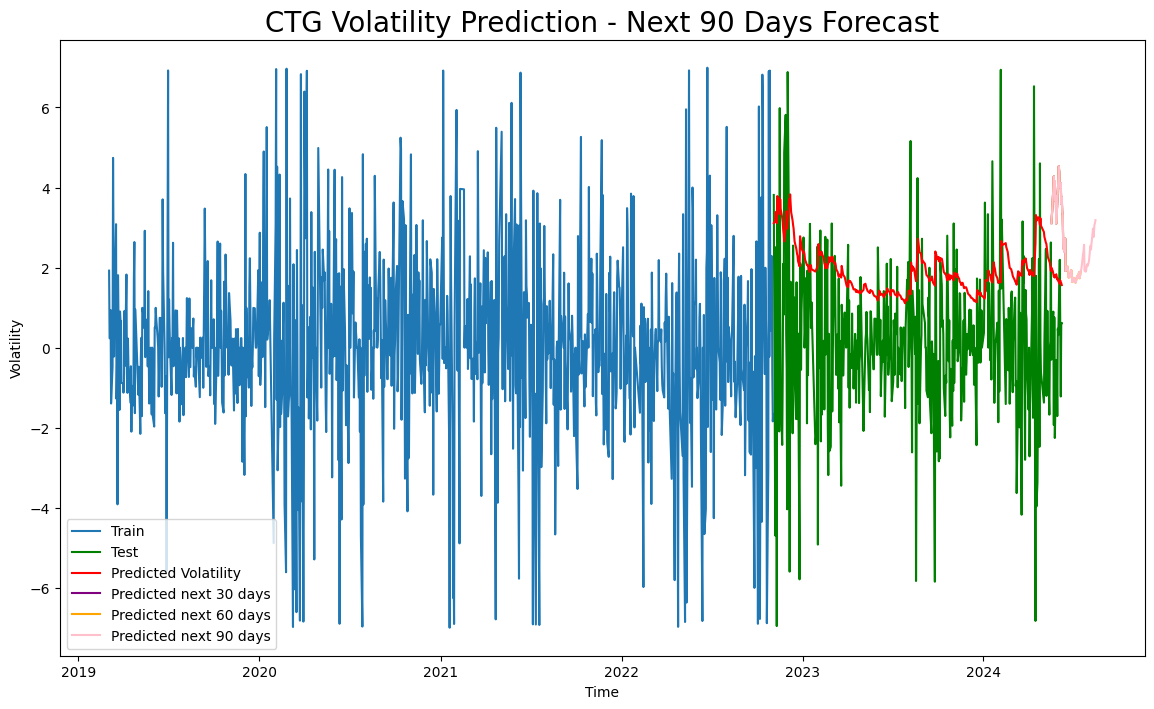

In [ ]:
# Đặt số ngày dự đoán
days_to_predict = [30, 60, 90]
colors = ['purple', 'orange', 'pink']  # Màu sắc cho từng đường dự đoán

# Đặt ngày bắt đầu dự đoán
start_date = pd.Timestamp('2024-05-17')

# Khởi tạo biểu đồ
plt.figure(figsize=(14, 8))

# Vẽ dữ liệu đào tạo
plt.plot(volatily_CTG[:-test_size_CTG], label='Train')
# Vẽ dữ liệu kiểm tra
plt.plot(volatily_CTG[-test_size_CTG:], label='Test', color='green')
# Vẽ dự đoán trượt
plt.plot(rolling_predictions_CTG, label='Predicted Volatility', color='red')

# Dự đoán cho mỗi số ngày được chỉ định và vẽ biểu đồ tương ứng
for days, color in zip(days_to_predict, colors):
    index_forecasted_CTG, forecasted_next_days_CTG = predict_next_days(start_date, days, volatily_CTG, test_size_CTG)

    # Vẽ dự đoán cho số ngày được chỉ định
    plt.plot(index_forecasted_CTG, forecasted_next_days_CTG, label=f'Predicted next {days} days', color=color)

# Thêm tiêu đề và chú thích
plt.title(f'CTG Volatility Prediction - Next 90 Days Forecast', fontsize=20)
plt.legend(fontsize=10)
plt.xlabel('Time')
plt.ylabel('Volatility')

# Hiển thị biểu đồ
plt.show()


In [ ]:
test_actual_values_CTG = volatily_CTG[-test_size_CTG:]
test_predicted_values_CTG = rolling_predictions_CTG[volatily_CTG.index[-test_size_CTG:]]

# Calculate MAE_CTG (Mean Absolute Error)
mae_CTG = mean_absolute_error(test_actual_values_CTG, test_predicted_values_CTG)

# Calculate RMSE_CTG (Root Mean Squared Error)
rmse_CTG = np.sqrt(mean_squared_error(test_actual_values_CTG, test_predicted_values_CTG))

# Calculate MAPE_CTG (Mean Absolute Percentage Error)
epsilon = 1e-4
test_actual_values_CTG_nonzero = test_actual_values_CTG.replace(0, epsilon)
mape_CTG = np.mean(np.abs((test_actual_values_CTG - test_predicted_values_CTG) / test_actual_values_CTG_nonzero))

print("MAE_CTG:", mae_CTG)
print("RMSE_CTG:", rmse_CTG)
print("MAPE_CTG (%):", mape_CTG)

MAE_CTG: 2.088299695227827
RMSE_CTG: 2.6410659419404676
MAPE_CTG (%): nan


# **ACB**

In [ ]:
# Import data
df = pd.read_csv("ACB.VN.csv")
df.dropna(inplace=True)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

# Sort 'Date' asc
df.sort_values('Date', inplace=True)

#Input biến 'price'
price = pd.DataFrame(df, columns=['Close'])

In [ ]:
# df.head()
#5 dòng cuối
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-03,24850.0,24950.0,24600.0,24800.0,24800.0,17805500.0
2024-06-04,24800.0,24800.0,24450.0,24500.0,24500.0,9924200.0
2024-06-05,24750.0,24750.0,24300.0,24350.0,24350.0,11319900.0
2024-06-06,24400.0,24500.0,24300.0,24350.0,24350.0,8027700.0
2024-06-07,24550.0,24650.0,24300.0,24600.0,24600.0,6787101.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1313 entries, 2019-03-01 to 2024-06-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1313 non-null   float64
 1   High       1313 non-null   float64
 2   Low        1313 non-null   float64
 3   Close      1313 non-null   float64
 4   Adj Close  1313 non-null   float64
 5   Volume     1313 non-null   float64
dtypes: float64(6)
memory usage: 71.8 KB


In [ ]:
# Describe 'Close' price
# 25% q1, 75% q3, 50% median
price.describe()

,Close
count,1317.000000
mean,23713.870154
std,6526.769661
min,11925.876953
25%,16710.095703
50%,25192.072266
75%,28635.972656
max,37719.050781


# Visualize **data**

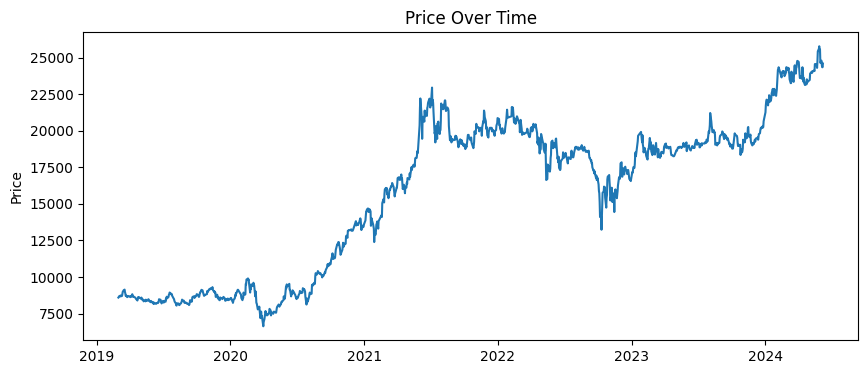

In [ ]:
# 'Close' price follow time
plt.figure(figsize=(10, 4))
plt.plot(df['Close'])
plt.title('Price Over Time')
plt.ylabel('Price')
plt.show()

## Calculate %**Volality** and **Visualize**

Text(0.5, 1.0, 'Volatily')

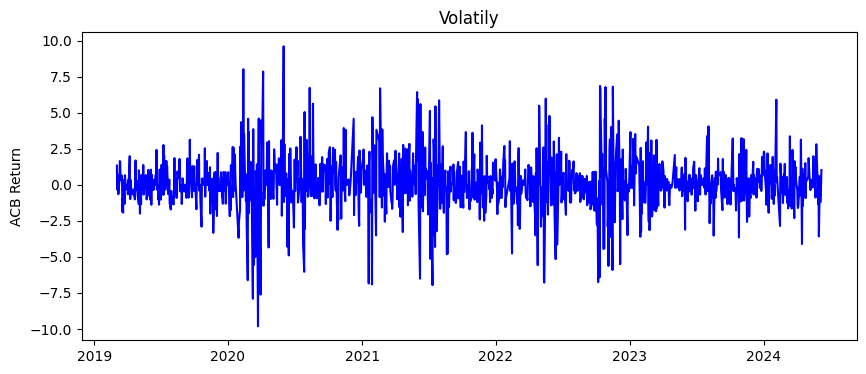

In [ ]:
volatily_ACB = 100 * price.pct_change().dropna()
plt.figure(figsize=(10,4))
plt.plot(volatily_ACB, color='blue')
# Tỷ suất lợi nhuận
plt.ylabel('ACB Return')
plt.title('Volatily')

# Check **STATIONARITY**

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt
# Function kiểm tra tính dừng
def test_stationarity(data):
    # Kiểm tra tính dừng bằng Augmented Dickey-Fuller test (ADF)
    result_adf = adfuller(data)
    print('ADF Statistic:', result_adf[0])
    print('p-value:', result_adf[1])
    print('Critical Values:', result_adf[4])
    if result_adf[1] <= 0.05:
        print("ADF test: Data is stationary")
    else:
        print("ADF test: Data is non-stationary")
# test_stationarity(df['Close'])
test_stationarity(volatily_ACB)

ADF Statistic: -36.99613917509124
p-value: 0.0
Critical Values: {'1%': -3.4353478262263777, '5%': -2.863747134166378, '10%': -2.567945089732423}
ADF test: Data is stationary


# Calculate ACF, PACF to select p,q params for model GARCH(p,q)
# With q = acf, p = pacf ( lấy các điểm lồi lên khỏi vùng xanh là được )

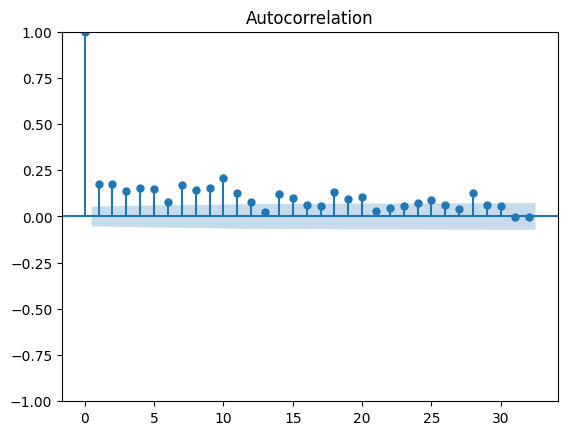

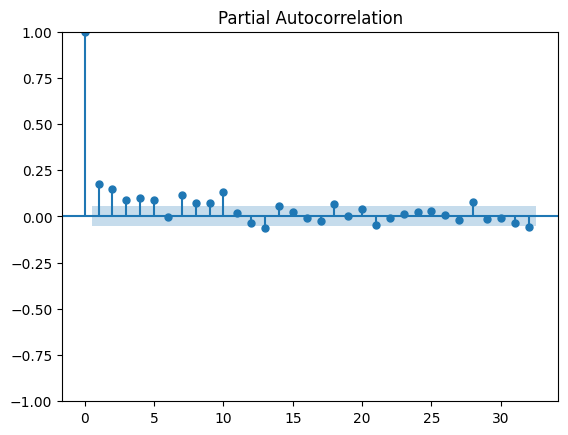

In [ ]:
plot_acf(volatily_ACB**2)
plot_pacf(volatily_ACB**2)
plt.show()

In [ ]:
# Fit model
model = arch_model(volatily_ACB, p=1, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7618.760111498415
Iteration:      2,   Func. Count:     15,   Neg. LLF: 5766.251858235383
Iteration:      3,   Func. Count:     23,   Neg. LLF: 3141.2157076281546
Iteration:      4,   Func. Count:     30,   Neg. LLF: 2834.1522989988616
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2509.8433745804427
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2506.4251071029475
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2506.4241546576404
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2506.42414956239
Iteration:      9,   Func. Count:     58,   Neg. LLF: 2506.424149562395
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2506.42414956239
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2506.42
Distribution:                  Normal   AIC:                           5020.85
Method:            Maximum Likelihood   BIC:                           5041.57
                                        No. Observations:                 1312
Date:                Sun, Jun 16 2024   Df Residuals:                     1311
Time:                        15:25:45   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0714  3.952e-02      1.807  7.076e-02 [-6.044e-03,  0.149]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0835  3.266e-02      2.558  1.054e-02 [1.952e-02,  0.148]
alpha[1]       0.1112  2.234e-02      4.976  6.503e-07 [6.738e-02,  0.155]
beta[1]        0.8690  2.631e-02     33.033 2.718e-239   [  0.817,  0.921]
==========================================================================

Covariance estimator: robust
"""

# **Rolling Forecast Origin**

In [ ]:
rolling_predictions_ACB = []
test_size_ACB = int(0.3 * len(volatily_ACB))
for i in range(test_size_ACB):
  # Tạo tập dữ liệu đào tạo bằng cách cắt từ đầu đến mỗi điểm dữ liệu trong tập kiểm tra
  train_ACB = volatily_ACB[:-(test_size_ACB-i)]
  # Tạo mô hình GARCH (1,1) bằng cách sử dụng dữ liệu đào tạo
  model_ACB = arch_model(train_ACB, p=1, q=1)

  # Ước lượng mô hình GARCH đã tạo với dữ liệu đào tạo
  model_fit_ACB = model_ACB.fit(disp='off')

  # Dự đoán một giai đoạn tiếp theo của biến động (volatility) bằng cách sử dụng hàm forecast() từ mô hình đã ước lượng
  pred_ACB = model_fit_ACB.forecast(horizon=1)

  # Thêm giá trị dự đoán cuối cùng của mỗi lượt dự đoán vào danh sách rolling_predictions_ACB
  rolling_predictions_ACB.append(np.sqrt(pred_ACB.variance.values[-1,:][0]))

In [ ]:
# Tạo một Series Pandas từ danh sách rolling_predictions, với index được thiết lập là các chỉ mục cuối cùng của tập dữ liệu volatily (tập kiểm tra)
rolling_predictions_ACB = pd.Series(rolling_predictions_ACB, index=volatily_ACB.index[-test_size_ACB:])

In [ ]:
from datetime import datetime, timedelta
# Giả định volatily_ACB và test_size_ACB đã được xác định trước đó
def predict_next_days(start_date, days_to_predict, volatily_ACB, test_size_ACB):
    forecasted_next_days_ACB = []
    for i in range(days_to_predict):
        train_ACB = volatily_ACB[:-(test_size_ACB+i)]
        model_ACB = arch_model(train_ACB, p=1, q=1)
        model_fit_ACB = model_ACB.fit(disp='off')
        pred_ACB = model_fit_ACB.forecast(horizon=1)
        forecasted_next_days_ACB.append(np.sqrt(pred_ACB.variance.values[-1,:][0]))

    # Thêm một giá trị không xác định (nan) vào cuối danh sách dự đoán để đại diện cho dự đoán cuối cùng
    forecasted_next_days_ACB.append(np.nan)

    # Tạo ngày bắt đầu dự đoán bằng cách sử dụng start_date được chỉ định
    start_date = start_date

    # Tạo một danh sách chỉ mục mới cho các dự đoán tiếp theo số ngày được chỉ định
    index_forecasted_ACB = pd.date_range(start=start_date, periods=len(forecasted_next_days_ACB))

    return index_forecasted_ACB, forecasted_next_days_ACB

# **Gộp 3 đường vào cùng 1 biểu đồ**

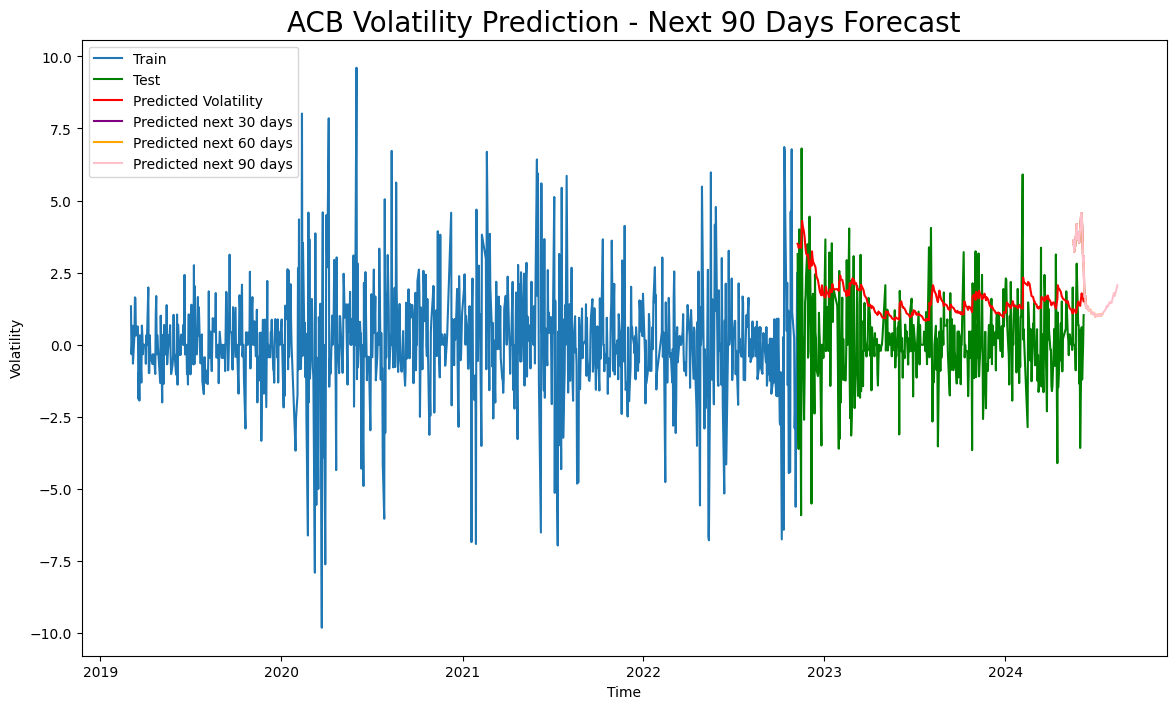

In [ ]:
# Đặt số ngày dự đoán
days_to_predict = [30, 60, 90]
colors = ['purple', 'orange', 'pink']  # Màu sắc cho từng đường dự đoán

# Đặt ngày bắt đầu dự đoán
start_date = pd.Timestamp('2024-05-17')

# Khởi tạo biểu đồ
plt.figure(figsize=(14, 8))

# Vẽ dữ liệu đào tạo
plt.plot(volatily_ACB[:-test_size_ACB], label='Train')
# Vẽ dữ liệu kiểm tra
plt.plot(volatily_ACB[-test_size_ACB:], label='Test', color='green')
# Vẽ dự đoán trượt
plt.plot(rolling_predictions_ACB, label='Predicted Volatility', color='red')

# Dự đoán cho mỗi số ngày được chỉ định và vẽ biểu đồ tương ứng
for days, color in zip(days_to_predict, colors):
    index_forecasted_ACB, forecasted_next_days_ACB = predict_next_days(start_date, days, volatily_ACB, test_size_ACB)

    # Vẽ dự đoán cho số ngày được chỉ định
    plt.plot(index_forecasted_ACB, forecasted_next_days_ACB, label=f'Predicted next {days} days', color=color)

# Thêm tiêu đề và chú thích
plt.title(f'ACB Volatility Prediction - Next 90 Days Forecast', fontsize=20)
plt.legend(fontsize=10)
plt.xlabel('Time')
plt.ylabel('Volatility')

# Hiển thị biểu đồ
plt.show()


In [ ]:
test_actual_values_ACB = volatily_ACB[-test_size_ACB:]
test_predicted_values_ACB = rolling_predictions_ACB[volatily_ACB.index[-test_size_ACB:]]

# Calculate MAE_ACB (Mean Absolute Error)
mae_ACB = mean_absolute_error(test_actual_values_ACB, test_predicted_values_ACB)

# Calculate RMSE_ACB (Root Mean Squared Error)
rmse_ACB = np.sqrt(mean_squared_error(test_actual_values_ACB, test_predicted_values_ACB))

# Calculate MAPE_ACB (Mean Absolute Percentage Error)
epsilon = 1e-4
test_actual_values_ACB_nonzero = test_actual_values_ACB.replace(0, epsilon)
mape_ACB = np.mean(np.abs((test_actual_values_ACB - test_predicted_values_ACB) / test_actual_values_ACB_nonzero))

print("MAE_ACB:", mae_ACB)
print("RMSE_ACB:", rmse_ACB)
print("MAPE_ACB (%):", mape_ACB)

MAE_ACB: 1.7178619635671413
RMSE_ACB: 2.1713706646725592
MAPE_ACB (%): nan
